# Problem Identification

Main problem: The company has difficulty determining whether an employee will be promoted or not 

Solution: Create machine learning algorithm that predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.

In [ ]:
pip install category_encoders 

In [ ]:
pip install imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report, recall_score, precision_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
pd.options.display.max_colwidth = 9999

In [ ]:
smote = SMOTE()

# Data Understanding

In [ ]:
df_train = pd.read_csv('train.csv')
df_train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,45,0


In [ ]:
df_describe =[]

for i in df_train.columns: 
    df_describe.append([ 
        i,
        df_train[i].dtypes,
        df_train[i].isna().sum(),
        round((((df_train[i].isna().sum())/(len(df_train)))*100),2),
        df_train[i].nunique(),
        df_train[i].unique() 
    ])
    
desc = pd.DataFrame(df_describe, columns=['column','type','nan','nan%','nunique','unique'])
desc

,column,type,nan,nan%,nunique,unique
0,employee_id,int64,0,0.00,54808,"[65438, 65141, 7513, 2542, 48945, 58896, 20379, 16290, 73202, 28911, 29934, 49017, 60051, 38401, 77040, 43931, 7152, 9403, 17436, 54461, 12067, 33332, 58789, 71177, 52057, 26585, 37749, 2370, 8219, 74759, 27395, 58536, 35465, 51756, 57011, 77064, 64062, 47123, 56275, 58304, 25014, 40097, 23560, 17423, 61758, 75009, 17876, 36924, 50408, 18013, 24104, 32083, 38330, 33690, 73161, 13596, 45709, 32709, 26599, 32656, 17673, 3113, 9150, 14107, 58747, 3342, 77981, 16502, 73729, 45624, 75677, 24040, 68082, 51786, 77577, 54782, 52368, 75103, 7520, 59147, 53092, 34564, 66013, 77135, 44575, 47498, 20798, 69094, 22261, 9589, 62658, 21628, 68484, 44523, 35420, 43923, 64109, 41983, 21440, 51256, ...]"
1,department,object,0,0.00,9,"[Sales & Marketing, Operations, Technology, Analytics, R&D, Procurement, Finance, HR, Legal]"
2,region,object,0,0.00,34,"[region_7, region_22, region_19, region_23, region_26, region_2, region_20, region_34, region_1, region_4, region_29, region_31, region_15, region_14, region_11, region_5, region_28, region_17, region_13, region_16, region_25, region_10, region_27, region_30, region_12, region_21, region_8, region_32, region_6, region_33, region_24, region_3, region_9, region_18]"
3,education,object,2409,4.40,3,"[Master's & above, Bachelor's, nan, Below Secondary]"
4,gender,object,0,0.00,2,"[f, m]"
5,recruitment_channel,object,0,0.00,3,"[sourcing, other, referred]"
6,no_of_trainings,int64,0,0.00,10,"[1, 2, 3, 4, 7, 5, 6, 8, 10, 9]"
7,age,int64,0,0.00,41,"[35, 30, 34, 39, 45, 31, 33, 28, 32, 49, 37, 38, 41, 27, 29, 26, 24, 57, 40, 42, 23, 59, 44, 50, 56, 20, 25, 47, 36, 46, 60, 43, 22, 54, 58, 48, 53, 55, 51, 52, 21]"
8,previous_year_rating,float64,4124,7.52,5,"[5.0, 3.0, 1.0, 4.0, nan, 2.0]"
9,length_of_service,int64,0,0.00,35,"[8, 4, 7, 10, 2, 5, 6, 1, 3, 16, 9, 11, 26, 12, 17, 14, 13, 19, 15, 23, 18, 20, 22, 25, 28, 24, 31, 21, 29, 30, 34, 27, 33, 32, 37]"


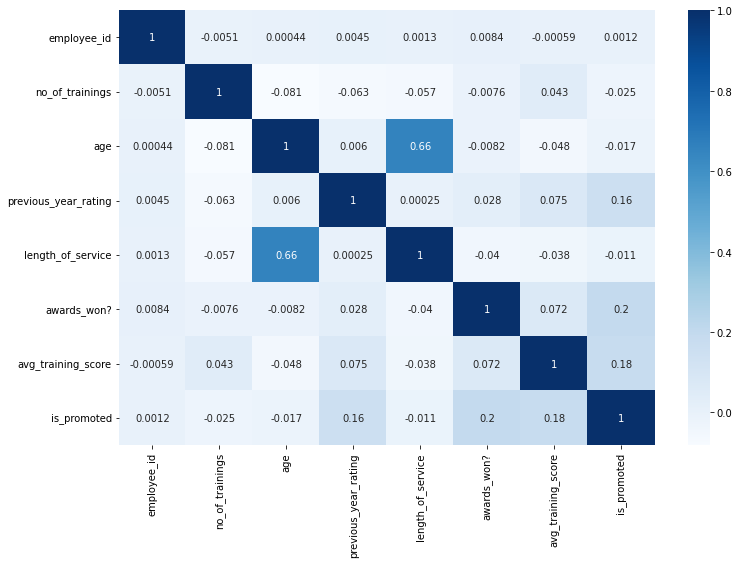

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df_train.corr(), annot=True, cmap='Blues')
plt.show()

# EDA

## department

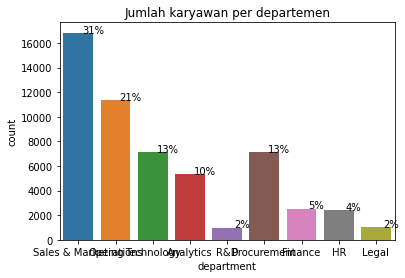

In [ ]:
plt.title("Jumlah karyawan per departemen")
ax = sns.countplot(df_train['department'])
total = len(df_train)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## Education

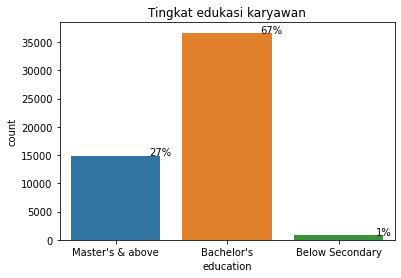

In [ ]:
plt.title("Tingkat edukasi karyawan")
ax = sns.countplot(df_train['education'])
total = len(df_train)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## gender

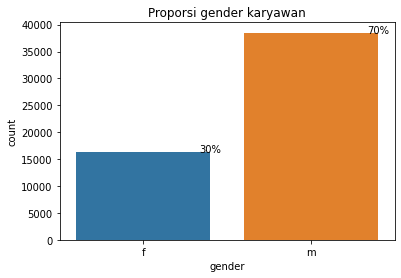

In [ ]:
plt.title("Proporsi gender karyawan")
ax = sns.countplot(df_train['gender'])
total = len(df_train)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## recruitment_channel

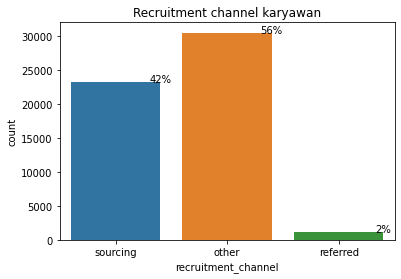

In [ ]:
plt.title("Recruitment channel karyawan")
ax = sns.countplot(df_train['recruitment_channel'])
total = len(df_train)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## awards_won?

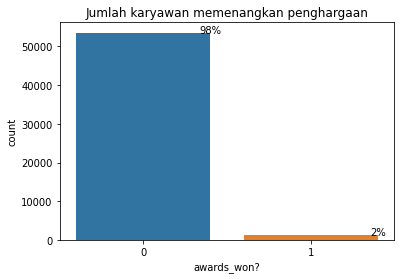

In [ ]:
plt.title("Jumlah karyawan memenangkan penghargaan")
ax = sns.countplot(df_train['awards_won?'])
total = len(df_train)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## is_promoted

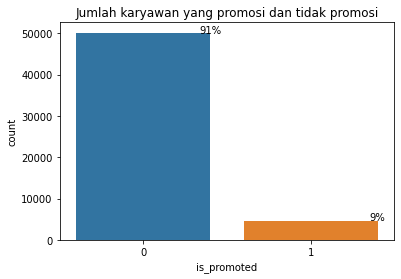

In [ ]:
plt.title("Jumlah karyawan yang promosi dan tidak promosi")
ax = sns.countplot(df_train['is_promoted'])
total = len(df_train)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

# Data Cleaning

In [ ]:
df_train['education'] = df_train['education'].fillna("Bachelor's")
df_train['previous_year_rating'].fillna(df_train['previous_year_rating'].median(), inplace=True)

In [ ]:
df_describe =[]

for i in df_train.columns: 
    df_describe.append([ 
        i,
        df_train[i].dtypes,
        df_train[i].isna().sum(),
        round((((df_train[i].isna().sum())/(len(df_train)))*100),2),
        df_train[i].nunique(),
        df_train[i].unique() 
    ])
    
desc = pd.DataFrame(df_describe, columns=['column','type','nan','nan%','nunique','unique'])
desc

,column,type,nan,nan%,nunique,unique
0,employee_id,int64,0,0.0,54808,"[65438, 65141, 7513, 2542, 48945, 58896, 20379, 16290, 73202, 28911, 29934, 49017, 60051, 38401, 77040, 43931, 7152, 9403, 17436, 54461, 12067, 33332, 58789, 71177, 52057, 26585, 37749, 2370, 8219, 74759, 27395, 58536, 35465, 51756, 57011, 77064, 64062, 47123, 56275, 58304, 25014, 40097, 23560, 17423, 61758, 75009, 17876, 36924, 50408, 18013, 24104, 32083, 38330, 33690, 73161, 13596, 45709, 32709, 26599, 32656, 17673, 3113, 9150, 14107, 58747, 3342, 77981, 16502, 73729, 45624, 75677, 24040, 68082, 51786, 77577, 54782, 52368, 75103, 7520, 59147, 53092, 34564, 66013, 77135, 44575, 47498, 20798, 69094, 22261, 9589, 62658, 21628, 68484, 44523, 35420, 43923, 64109, 41983, 21440, 51256, ...]"
1,department,object,0,0.0,9,"[Sales & Marketing, Operations, Technology, Analytics, R&D, Procurement, Finance, HR, Legal]"
2,region,object,0,0.0,34,"[region_7, region_22, region_19, region_23, region_26, region_2, region_20, region_34, region_1, region_4, region_29, region_31, region_15, region_14, region_11, region_5, region_28, region_17, region_13, region_16, region_25, region_10, region_27, region_30, region_12, region_21, region_8, region_32, region_6, region_33, region_24, region_3, region_9, region_18]"
3,education,object,0,0.0,3,"[Master's & above, Bachelor's, Below Secondary]"
4,gender,object,0,0.0,2,"[f, m]"
5,recruitment_channel,object,0,0.0,3,"[sourcing, other, referred]"
6,no_of_trainings,int64,0,0.0,10,"[1, 2, 3, 4, 7, 5, 6, 8, 10, 9]"
7,age,int64,0,0.0,41,"[35, 30, 34, 39, 45, 31, 33, 28, 32, 49, 37, 38, 41, 27, 29, 26, 24, 57, 40, 42, 23, 59, 44, 50, 56, 20, 25, 47, 36, 46, 60, 43, 22, 54, 58, 48, 53, 55, 51, 52, 21]"
8,previous_year_rating,float64,0,0.0,5,"[5.0, 3.0, 1.0, 4.0, 2.0]"
9,length_of_service,int64,0,0.0,35,"[8, 4, 7, 10, 2, 5, 6, 1, 3, 16, 9, 11, 26, 12, 17, 14, 13, 19, 15, 23, 18, 20, 22, 25, 28, 24, 31, 21, 29, 30, 34, 27, 33, 32, 37]"


In [ ]:
df_train.corr(method= "pearson")["is_promoted"].sort_values()

no_of_trainings        -0.024896
age                    -0.017166
length_of_service      -0.010670
employee_id             0.001206
previous_year_rating    0.153230
avg_training_score      0.181147
awards_won?             0.195871
is_promoted             1.000000
Name: is_promoted, dtype: float64

In [ ]:
data_int = ['no_of_trainings','age','previous_year_rating','length_of_service','awards_won?','avg_training_score']
data_cat = ['region','region','education','gender','recruitment_channel']

In [ ]:
desc.set_index('column').T[data_cat].T

,type,nan,nan%,nunique,unique
column,,,,,
region,object,0,0,34,"[region_7, region_22, region_19, region_23, region_26, region_2, region_20, region_34, region_1, region_4, region_29, region_31, region_15, region_14, region_11, region_5, region_28, region_17, region_13, region_16, region_25, region_10, region_27, region_30, region_12, region_21, region_8, region_32, region_6, region_33, region_24, region_3, region_9, region_18]"
region,object,0,0,34,"[region_7, region_22, region_19, region_23, region_26, region_2, region_20, region_34, region_1, region_4, region_29, region_31, region_15, region_14, region_11, region_5, region_28, region_17, region_13, region_16, region_25, region_10, region_27, region_30, region_12, region_21, region_8, region_32, region_6, region_33, region_24, region_3, region_9, region_18]"
education,object,0,0,3,"[Master's & above, Bachelor's, Below Secondary]"
gender,object,0,0,2,"[f, m]"
recruitment_channel,object,0,0,3,"[sourcing, other, referred]"


## Encoding

### Departement

In [ ]:
def bin_table(column_name): #function untuk menampilkan urutan nilai binary pada masing-masing unique value
  return pd.DataFrame({
                      'Unique': df_train[column_name].unique(),
                      'Order': range(1,len(df_train[column_name].unique())+1),
                      'Binary Num': ["{0:b}".format(i) for i in range(1,len(df_train[column_name].unique())+1)],
                      })
bin_table('department')

,Unique,Order,Binary Num
0,Sales & Marketing,1,1
1,Operations,2,10
2,Technology,3,11
3,Analytics,4,100
4,R&D,5,101
5,Procurement,6,110
6,Finance,7,111
7,HR,8,1000
8,Legal,9,1001


In [ ]:
binary_encoder = ce.BinaryEncoder(['department'])
df_department_bin = binary_encoder.fit_transform(df_train['department'])
df_department_bin

,department_0,department_1,department_2,department_3
0,0,0,0,1
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,1,1
...,...,...,...,...
54803,0,0,1,1
54804,0,0,1,0
54805,0,1,0,0
54806,0,0,0,1


### Region

In [ ]:
bin_table('region')

,Unique,Order,Binary Num
0,region_7,1,1
1,region_22,2,10
2,region_19,3,11
3,region_23,4,100
4,region_26,5,101
5,region_2,6,110
6,region_20,7,111
7,region_34,8,1000
8,region_1,9,1001
9,region_4,10,1010


In [ ]:
binary_encoder = ce.BinaryEncoder(['region'])
df_region_bin = binary_encoder.fit_transform(df_train['region'])
df_region_bin

,region_0,region_1,region_2,region_3,region_4,region_5
0,0,0,0,0,0,1
1,0,0,0,0,1,0
2,0,0,0,0,1,1
3,0,0,0,1,0,0
4,0,0,0,1,0,1
...,...,...,...,...,...,...
54803,0,0,1,1,1,0
54804,0,1,0,1,1,1
54805,0,0,1,0,0,1
54806,1,0,0,0,0,1


### Education

In [ ]:
df_education_ordinal = pd.DataFrame(df_train['education'].map({'Below Secondary':1,"Bachelor's":2,"Master's & above":3}))
df_education_ordinal

,education
0,3
1,2
2,2
3,2
4,2
...,...
54803,2
54804,3
54805,2
54806,2


### Gender

In [ ]:
df_gender_recruit_oh = pd.get_dummies(df_train,columns=['gender','recruitment_channel']).iloc[:,[-5,-4,-3,-2,-1]]
df_gender_recruit_oh

,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,0,0,0,1
1,0,1,1,0,0
2,0,1,0,0,1
3,0,1,1,0,0
4,0,1,1,0,0
...,...,...,...,...,...
54803,0,1,0,0,1
54804,1,0,1,0,0
54805,0,1,1,0,0
54806,0,1,0,0,1


In [ ]:
data_final = pd.concat([df_department_bin,df_region_bin,df_education_ordinal,df_gender_recruit_oh,df_train],axis=1)
data_final.drop(['department','region','gender','education','recruitment_channel'],axis=1,inplace=True)
data_final

,department_0,department_1,department_2,department_3,region_0,region_1,region_2,region_3,region_4,region_5,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,65438,1,35,5.0,8,0,49,0
1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,65141,1,30,5.0,4,0,60,0
2,0,0,0,1,0,0,0,0,1,1,0,1,0,0,1,7513,1,34,3.0,7,0,50,0
3,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,2542,2,39,1.0,10,0,50,0
4,0,0,1,1,0,0,0,1,0,1,0,1,1,0,0,48945,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,0,0,1,1,0,0,1,1,1,0,0,1,0,0,1,3030,1,48,3.0,17,0,78,0
54804,0,0,1,0,0,1,0,1,1,1,1,0,1,0,0,74592,1,37,2.0,6,0,56,0
54805,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,13918,1,27,5.0,3,0,79,0
54806,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,13614,1,29,1.0,2,0,45,0


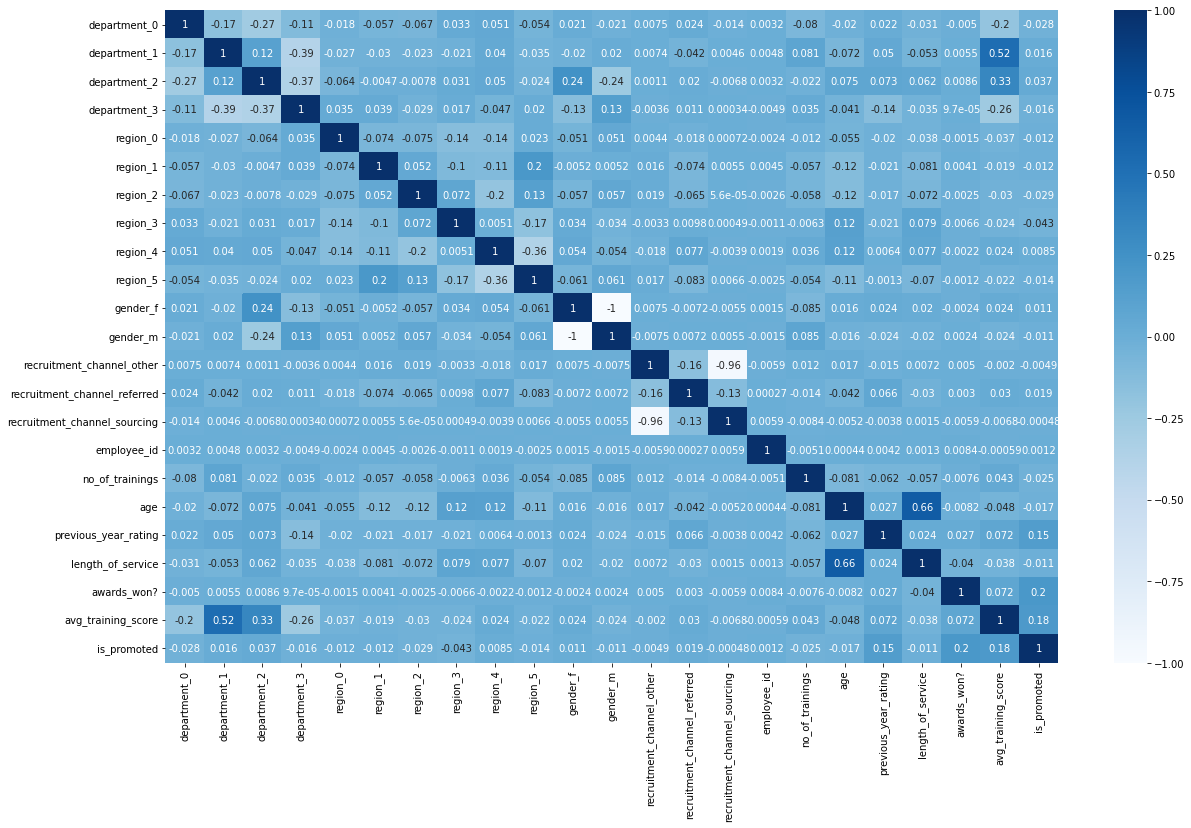

In [ ]:
plt.figure(figsize= (20,12))
sns.heatmap(data_final.corr(method= "pearson"), annot= True, cmap="Blues")

# Machine Learning

In [ ]:
X= data_final.drop(['employee_id','is_promoted'], axis = 1)

In [ ]:
y= data_final['is_promoted']

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=123)
X_train_res, y_train_res = sm.fit_resample(X, y.ravel())

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(
    X_train_res,
    y_train_res,
    stratify=y_train_res,
    test_size = 0.3,
    random_state=2021)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(70196, 21)
(30084, 21)
(70196,)
(30084,)


In [ ]:
logreg = LogisticRegression(solver='liblinear', random_state=2021)
logreg.fit(X_train, y_train)
logreg_y_pred = logreg.predict(X_test)

In [ ]:
print(classification_report(y_test,logreg_y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85     15042
           1       0.87      0.81      0.84     15042

    accuracy                           0.85     30084
   macro avg       0.85      0.85      0.85     30084
weighted avg       0.85      0.85      0.85     30084



In [ ]:
logreg = LogisticRegression(solver='liblinear', random_state=2021)
logreg.fit(X_train, y_train)
logreg_y_pred = logreg.predict(X_train)

In [ ]:
print(classification_report(y_train,logreg_y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85     35098
           1       0.87      0.81      0.84     35098

    accuracy                           0.84     70196
   macro avg       0.85      0.84      0.84     70196
weighted avg       0.85      0.84      0.84     70196

